In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import datetime as dt 
from scipy import stats
from IPython.display import display 
#
import matplotlib.pyplot as plt
%matplotlib inline
#
import seaborn as sns
sns.set()
#
import gc

In [2]:
pd.set_option('display.max_columns', 200)
pd.options.display.max_rows = 50
pd.options.display.float_format='{:,.2f}'.format
#
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (18, 8)

In [3]:
# client data
client_train = pd.read_csv('client_train.csv')
client_test = pd.read_csv('client_test.csv')
#
invoice_train = pd.read_csv('invoice_train.csv')
invoice_test = pd.read_csv('invoice_test.csv')
#
#copies of the data
client_train_copy = client_train.copy()
client_test_copy = client_test.copy()
#
invoice_train_copy = invoice_train.copy()
invoice_test_copy = invoice_test.copy()

In [4]:
# Check The Shape Of The Data Loaded
print('Client Train data shape: {} Rows, {} Columns'.format(*client_train.shape))
print('Client Test data shape: {} Rows, {} Columns'.format(*client_test.shape))
#
# Check The Shape Of The Data Loaded
print('Invoice Train data shape: {} Rows, {} Columns'.format(*invoice_train.shape))
print('Invoice Test data shape: {} Rows, {} Columns'.format(*invoice_test.shape))

Client Train data shape: 135493 Rows, 6 Columns
Client Test data shape: 58069 Rows, 5 Columns
Invoice Train data shape: 4476749 Rows, 16 Columns
Invoice Test data shape: 1939730 Rows, 16 Columns


In [5]:
# Print First Few Rows Of The Data
display("Client Train data")
display(client_train.head(3))
display(client_train.tail(3))
display("Client test data")
display(client_test.head(3))
display(client_test.tail(3))
#
display("Invoice Train data")
display(invoice_train.head(3))
display(invoice_train.tail(3))
display("Invoice test data")
display(invoice_test.head(3))
display(invoice_test.tail(3))

'Client Train data'

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,31/12/1994,0.00
1,69,train_Client_1,11,107,29/05/2002,0.00
2,62,train_Client_10,11,301,13/03/1986,0.00


,disrict,client_id,client_catg,region,creation_date,target
135490,63,train_Client_99997,11,311,22/11/2011,0.00
135491,60,train_Client_99998,11,101,22/12/1993,0.00
135492,60,train_Client_99999,11,101,18/02/1986,0.00


'Client test data'

,disrict,client_id,client_catg,region,creation_date
0,62,test_Client_0,11,307,28/05/2002
1,69,test_Client_1,11,103,06/08/2009
2,62,test_Client_10,11,310,07/04/2004


,disrict,client_id,client_catg,region,creation_date
58066,60,test_Client_9997,11,101,04/03/1978
58067,60,test_Client_9998,11,101,23/02/2018
58068,69,test_Client_9999,11,104,14/03/1990


'Invoice Train data'

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC


,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
4476746,train_Client_99999,1996-09-25,11,560948,0,203,6,1,259,0,0,0,13884,14143,4,ELEC
4476747,train_Client_99999,1996-05-28,11,560948,0,203,6,1,603,0,0,0,13281,13884,4,ELEC
4476748,train_Client_99999,1996-01-25,11,560948,0,203,6,1,516,0,0,0,12765,13281,4,ELEC


'Invoice test data'

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,test_Client_0,2018-03-16,11,651208,0,203,8,1,755,0,0,0,19145,19900,8,ELEC
1,test_Client_0,2014-03-21,11,651208,0,203,8,1,1067,0,0,0,13725,14792,8,ELEC
2,test_Client_0,2014-07-17,11,651208,0,203,8,1,0,0,0,0,14792,14792,4,ELEC


,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
1939727,test_Client_9999,2012-12-03,11,869269,0,203,6,1,312,0,0,0,22272,22584,4,ELEC
1939728,test_Client_9999,2009-07-01,11,869269,0,203,6,1,236,0,0,0,19909,20145,4,ELEC
1939729,test_Client_9999,2017-03-11,11,869269,0,203,9,1,800,282,0,0,32834,33916,4,ELEC


In [6]:
samplesub=pd.read_csv('SampleSubmission.csv')
display(samplesub.head(5))

,client_id,target
0,test_Client_0,0.96
1,test_Client_1,1.00
2,test_Client_10,0.61
3,test_Client_100,0.78
4,test_Client_1000,0.57


Target variable is given as probabilities between 0 - 1

In [7]:
# display data types for every variable in all dataframes
display('Client Data')
print('Client')
display(client_train.dtypes.value_counts())
display(client_test.dtypes.value_counts())
#
display('Invoice data')
print('Invoice')
display(invoice_train.dtypes.value_counts())
display(invoice_test.dtypes.value_counts())

'Client Data'

Client


int64      3
object     2
float64    1
dtype: int64

int64     3
object    2
dtype: int64

'Invoice data'

Invoice


int64     12
object     4
dtype: int64

int64     13
object     3
dtype: int64

### Data Profiling

In [8]:
# # train pandas profiling
# from pandas_profiling import ProfileReport
# profile = ProfileReport(client_train)
# profile.to_file(output_file='Client_train_Profile_Report.html')
# #
# profile = ProfileReport(invoice_train)
# profile.to_file(output_file='Invoice_train_Profile_Report.html')
# #
# #test data pandas profiling
# profile = ProfileReport(client_test)
# profile.to_file(output_file='Client_test_Profiling.html')
# #
# profile = ProfileReport(invoice_test)
# profile.to_file(output_file='Invoice_test_Profiling.html')

### Merge the Client and Invoice data sets

In [9]:
train = pd.merge(client_train, invoice_train, on='client_id')
test = pd.merge(client_test, invoice_test, on='client_id')
#
print('Train data')
display(train)
#
print('Test data')
display(test)

Train data


,disrict,client_id,client_catg,region,creation_date,target,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,60,train_Client_0,11,101,31/12/1994,0.00,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,60,train_Client_0,11,101,31/12/1994,0.00,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,60,train_Client_0,11,101,31/12/1994,0.00,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,60,train_Client_0,11,101,31/12/1994,0.00,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,60,train_Client_0,11,101,31/12/1994,0.00,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476744,60,train_Client_99998,11,101,22/12/1993,0.00,2005-08-19,10,1253571,0,202,9,1,400,135,0,0,3197,3732,8,ELEC
4476745,60,train_Client_99998,11,101,22/12/1993,0.00,2005-12-19,10,1253571,0,202,6,1,200,6,0,0,3732,3938,4,ELEC
4476746,60,train_Client_99999,11,101,18/02/1986,0.00,1996-09-25,11,560948,0,203,6,1,259,0,0,0,13884,14143,4,ELEC
4476747,60,train_Client_99999,11,101,18/02/1986,0.00,1996-05-28,11,560948,0,203,6,1,603,0,0,0,13281,13884,4,ELEC


Test data


,disrict,client_id,client_catg,region,creation_date,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,62,test_Client_0,11,307,28/05/2002,2018-03-16,11,651208,0,203,8,1,755,0,0,0,19145,19900,8,ELEC
1,62,test_Client_0,11,307,28/05/2002,2014-03-21,11,651208,0,203,8,1,1067,0,0,0,13725,14792,8,ELEC
2,62,test_Client_0,11,307,28/05/2002,2014-07-17,11,651208,0,203,8,1,0,0,0,0,14792,14792,4,ELEC
3,62,test_Client_0,11,307,28/05/2002,2015-07-13,11,651208,0,203,9,1,410,0,0,0,16122,16532,4,ELEC
4,62,test_Client_0,11,307,28/05/2002,2016-07-19,11,651208,0,203,9,1,412,0,0,0,17471,17883,4,ELEC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939725,69,test_Client_9999,11,104,14/03/1990,2010-03-11,11,869269,0,203,6,1,248,0,0,0,21114,21362,4,ELEC
1939726,69,test_Client_9999,11,104,14/03/1990,2011-03-15,11,869269,0,203,6,1,260,0,0,0,21362,21622,4,ELEC
1939727,69,test_Client_9999,11,104,14/03/1990,2012-12-03,11,869269,0,203,6,1,312,0,0,0,22272,22584,4,ELEC
1939728,69,test_Client_9999,11,104,14/03/1990,2009-07-01,11,869269,0,203,6,1,236,0,0,0,19909,20145,4,ELEC


In [10]:
# combine the test and train data for easier data wrangling and feature engineering
train['set'] = 'train'
test['set'] = 'test'
#
#merge the two sets of data for data analysis and visualization
data = pd.concat([train,test])
print('Train and Test data combined')
display(data)

Train and Test data combined


,disrict,client_id,client_catg,region,creation_date,target,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type,set
0,60,train_Client_0,11,101,31/12/1994,0.00,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC,train
1,60,train_Client_0,11,101,31/12/1994,0.00,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC,train
2,60,train_Client_0,11,101,31/12/1994,0.00,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC,train
3,60,train_Client_0,11,101,31/12/1994,0.00,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC,train
4,60,train_Client_0,11,101,31/12/1994,0.00,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939725,69,test_Client_9999,11,104,14/03/1990,nan,2010-03-11,11,869269,0,203,6,1,248,0,0,0,21114,21362,4,ELEC,test
1939726,69,test_Client_9999,11,104,14/03/1990,nan,2011-03-15,11,869269,0,203,6,1,260,0,0,0,21362,21622,4,ELEC,test
1939727,69,test_Client_9999,11,104,14/03/1990,nan,2012-12-03,11,869269,0,203,6,1,312,0,0,0,22272,22584,4,ELEC,test
1939728,69,test_Client_9999,11,104,14/03/1990,nan,2009-07-01,11,869269,0,203,6,1,236,0,0,0,19909,20145,4,ELEC,test


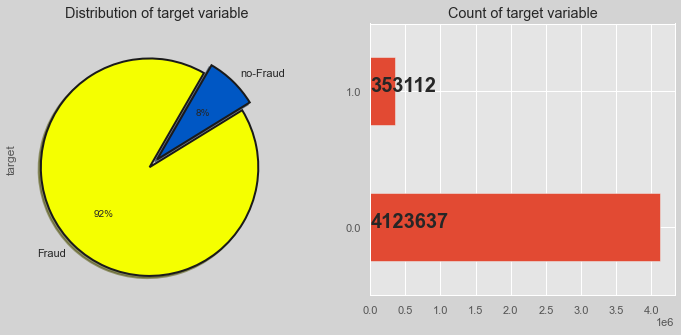

In [11]:
# Distribution of the target variable
fig = plt.figure(figsize=(12, 5))
plt.subplot(121)
data[data['set'] == "train"]["target"].value_counts().plot.pie(autopct = "%1.0f%%",  colors = sns.color_palette("prism",7),
                                                                                    startangle = 60,
                                                                                    labels=["Fraud","no-Fraud"],
                                                                                    wedgeprops={"linewidth":2,"edgecolor":"k"},
                                                                                    explode=[.1,0],shadow =True)
plt.title("Distribution of target variable")

plt.subplot(122)
ax = data[data['set'] == "train"]["target"].value_counts().plot(kind="barh")

for i,j in enumerate(data[data['set'] == "train"]["target"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

plt.title("Count of target variable")
#ax.set_facecolor("k")
fig.set_facecolor("lightgrey")
plt.show()

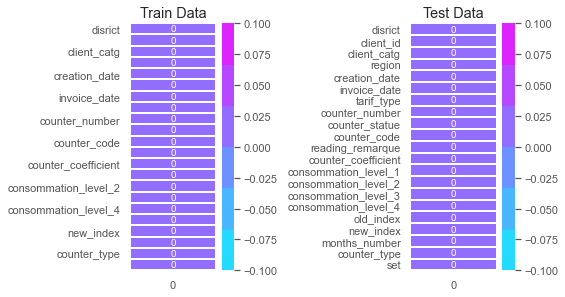

In [12]:
plt.figure(figsize=(12,10))

plt.subplot(231)
sns.heatmap(pd.DataFrame(train.isnull().sum()/train.shape[0]*100),annot=True,
            cmap=sns.color_palette("cool"),linewidth=1,linecolor="white")
plt.title("Train Data")

plt.subplot(232)
sns.heatmap(pd.DataFrame(test.isnull().sum()/test.shape[0]*100),annot=True,
            cmap=sns.color_palette("cool"),linewidth=1,linecolor="white")
plt.title("Test Data")

plt.subplots_adjust(wspace = 1.6)

We find that there are no ull values in our two datasets and so we procede to data analysis an feature engineering

## Feature Engineering

In [13]:
# drop duplicate values from the data
data.drop_duplicates(subset=data.columns, keep='last', inplace=True)

### One Hot Encode variables

In [14]:
coded = ['region', 'tarif_type', 'counter_number', 'counter_code', 'counter_coefficient', 'counter_statue']
#
for col in coded:
    data[col] = data[col].astype('category').cat.codes

### Dummify variables

In [15]:
#Dummify the variables
data = pd.get_dummies(data, columns=['disrict', 'client_catg', 'reading_remarque', 'counter_type'], 
                      drop_first=True, prefix=['disrict', 'client_catg', 'reading_remarque', 'counter_type'])

### Check for outliers

In [16]:
#define a function for treating outliers
def treat_outlier(col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    display(col)
    print('First quantile: ', Q1)
    print('Third quantile: ', Q3)
    print('IQR: ', IQR)
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    print('Lower bound: ', lower_bound, 'Upper bound: ', upper_bound)

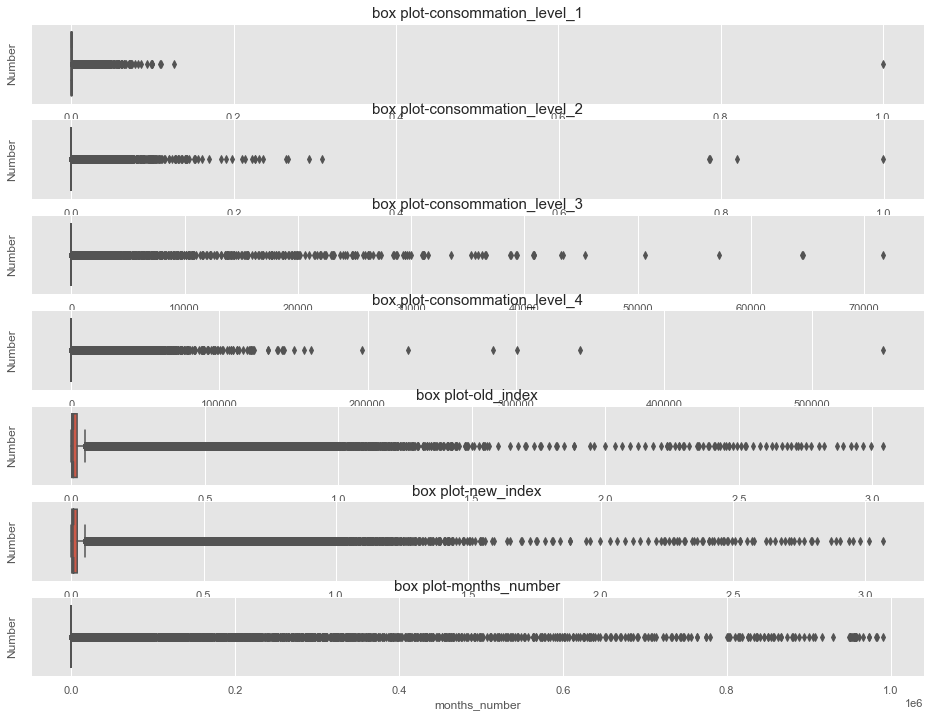

In [17]:
#checking for outliers using box plot
col_names = ['consommation_level_1', 'consommation_level_2', 'consommation_level_3', 'consommation_level_4', 'old_index',
       'new_index', 'months_number']
#
fig, ax=plt.subplots(len(col_names), figsize=(16,12))
for i, col_val in enumerate(col_names):
    sns.boxplot(data[col_val], notch= True, ax=ax[i])
    ax[i].set_title ('box plot-'+ col_val, fontsize= 15)
    ax[i].set_xlabel(col_val, fontsize= 12)
    ax[i].set_ylabel('Number', fontsize= 12)

plt.show()  

In [18]:
# check outliers for every numeric column
# scale the data values
#
for col in (col_names):
    treat_outlier(col)
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    data[col] = scaler.fit_transform(data[col].values.reshape(-1, 1))
#    
#data[col] = data[col].apply(lambda x: scaler().fit_transform(x))

'consommation_level_1'

First quantile:  80.0
Third quantile:  601.0
IQR:  521.0
Lower bound:  -701.5 Upper bound:  1382.5


'consommation_level_2'

First quantile:  0.0
Third quantile:  0.0
IQR:  0.0
Lower bound:  0.0 Upper bound:  0.0


'consommation_level_3'

First quantile:  0.0
Third quantile:  0.0
IQR:  0.0
Lower bound:  0.0 Upper bound:  0.0


'consommation_level_4'

First quantile:  0.0
Third quantile:  0.0
IQR:  0.0
Lower bound:  0.0 Upper bound:  0.0


'old_index'

First quantile:  1798.0
Third quantile:  21796.0
IQR:  19998.0
Lower bound:  -28199.0 Upper bound:  51793.0


'new_index'

First quantile:  2064.0
Third quantile:  22488.0
IQR:  20424.0
Lower bound:  -28572.0 Upper bound:  53124.0


'months_number'

First quantile:  4.0
Third quantile:  4.0
IQR:  0.0
Lower bound:  4.0 Upper bound:  4.0


In [19]:
data.dtypes

client_id                object
region                     int8
creation_date            object
target                  float64
invoice_date             object
tarif_type                 int8
counter_number            int32
counter_statue             int8
counter_code               int8
counter_coefficient        int8
consommation_level_1    float64
consommation_level_2    float64
consommation_level_3    float64
consommation_level_4    float64
old_index               float64
new_index               float64
months_number           float64
set                      object
disrict_62                uint8
disrict_63                uint8
disrict_69                uint8
client_catg_12            uint8
client_catg_51            uint8
reading_remarque_6        uint8
reading_remarque_7        uint8
reading_remarque_8        uint8
reading_remarque_9        uint8
reading_remarque_203      uint8
reading_remarque_207      uint8
reading_remarque_413      uint8
counter_type_GAZ          uint8
dtype: o

### Creation Date

In [20]:
# convet to date time format
data['creation_date'] = pd.to_datetime(data['creation_date'], yearfirst=True)
data['invoice_date'] = pd.to_datetime(data['invoice_date'], yearfirst=True)
#
# generate three columns of month year and day of the month
data[['creation_year', 'creation_month', 'creation_day']] = data['creation_date'].astype(str).str.split('-', expand=True).astype(int)
data[['invoice_year', 'invoice_month', 'invoice_day']] = data['invoice_date'].astype(str).str.split('-', expand=True).astype(int)
#
data.drop(['creation_date', 'invoice_date'], axis=1, inplace=True)

### Frequency encoded variables

In [21]:
vars = ['region', 'tarif_type', 'counter_number', 'counter_code', 'counter_coefficient', 'counter_statue', 'creation_month',
       'creation_year', 'creation_day', 'invoice_month', 'invoice_year', 'invoice_day']
#
for var in vars:
    freq = data[var].value_counts().to_dict()
    data[var + '_freq_code'] = data[var].map(freq)

In [22]:
train = data[data['set'] == 'train']
test = data[data['set'] == 'test']
#
train.drop(['set'], inplace=True, axis=1)
train.reset_index(drop = True, inplace=True)
#
test.drop(['target', 'set'], inplace=True, axis=1)
test.reset_index(drop = True, inplace=True)
#
# Print First Few Rows Of The Data
display("Train data")
print('Dimensins: ', train.shape)
display(train)
#
display("Test data")
print('Dimensins: ', test.shape)
display(test)

'Train data'

Dimensins:  (4476738, 46)


,client_id,region,target,tarif_type,counter_number,counter_statue,counter_code,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,disrict_62,disrict_63,disrict_69,client_catg_12,client_catg_51,reading_remarque_6,reading_remarque_7,reading_remarque_8,reading_remarque_9,reading_remarque_203,reading_remarque_207,reading_remarque_413,counter_type_GAZ,creation_year,creation_month,creation_day,invoice_year,invoice_month,invoice_day,region_freq_code,tarif_type_freq_code,counter_number_freq_code,counter_code_freq_code,counter_coefficient_freq_code,counter_statue_freq_code,creation_month_freq_code,creation_year_freq_code,creation_day_freq_code,invoice_month_freq_code,invoice_year_freq_code,invoice_day_freq_code
0,train_Client_0,0,0.00,3,200222,0,12,1,-0.46,-0.09,-0.11,-0.06,-0.09,-0.10,-0.01,0,0,0,0,0,0,0,1,0,0,0,0,0,1994,12,31,2014,3,24,1534238,3839396,35,2173804,6413976,6244643,934805,156341,286996,577032,492576,209365
1,train_Client_0,0,0.00,3,200222,0,12,1,1.10,0.06,-0.11,-0.06,-0.14,-0.11,-0.01,0,0,0,0,0,1,0,0,0,0,0,0,0,1994,12,31,2013,3,29,1534238,3839396,35,2173804,6413976,6244643,934805,156341,286996,577032,481639,160026
2,train_Client_0,0,0.00,3,200222,0,12,1,-0.40,-0.09,-0.11,-0.06,-0.08,-0.09,-0.01,0,0,0,0,0,0,0,1,0,0,0,0,0,1994,12,31,2015,3,23,1534238,3839396,35,2173804,6413976,6244643,934805,156341,286996,577032,516715,213486
3,train_Client_0,0,0.00,3,200222,0,14,1,-0.43,-0.09,-0.11,-0.06,-0.08,-0.09,-0.01,0,0,0,0,0,0,0,1,0,0,0,0,0,1994,12,31,2015,7,13,1534238,3839396,35,791963,6413976,6244643,934805,156341,286996,506894,516715,198529
4,train_Client_0,0,0.00,3,200222,0,14,1,0.22,-0.09,-0.11,-0.06,-0.07,-0.07,-0.01,0,0,0,0,0,0,0,0,1,0,0,0,0,1994,12,31,2016,11,17,1534238,3839396,35,791963,6413976,6244643,934805,156341,286996,514310,549878,206322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476733,train_Client_99998,0,0.00,2,195717,0,11,1,-0.02,0.02,-0.11,-0.06,-0.36,-0.35,-0.01,0,0,0,0,0,0,0,0,1,0,0,0,0,1993,12,22,2005,8,19,1534238,395785,6,491992,6413976,6244643,934805,138585,229897,506707,92481,208214
4476734,train_Client_99998,0,0.00,2,195717,0,11,1,-0.30,-0.09,-0.11,-0.06,-0.34,-0.35,-0.01,0,0,0,0,0,1,0,0,0,0,0,0,0,1993,12,22,2005,12,19,1534238,395785,6,491992,6413976,6244643,934805,138585,229897,472475,92481,208214
4476735,train_Client_99999,0,0.00,3,133767,0,12,1,-0.21,-0.09,-0.11,-0.06,-0.10,-0.10,-0.01,0,0,0,0,0,1,0,0,0,0,0,0,0,1986,2,18,1996,9,25,1534238,3839396,3,2173804,6413976,6244643,339115,124597,211074,481047,1670,193103
4476736,train_Client_99999,0,0.00,3,133767,0,12,1,0.27,-0.09,-0.11,-0.06,-0.11,-0.11,-0.01,0,0,0,0,0,1,0,0,0,0,0,0,0,1986,2,18,1996,5,28,1534238,3839396,3,2173804,6413976,6244643,339115,124597,211074,599712,1670,200100


'Test data'

Dimensins:  (1939722, 45)


,client_id,region,tarif_type,counter_number,counter_statue,counter_code,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,disrict_62,disrict_63,disrict_69,client_catg_12,client_catg_51,reading_remarque_6,reading_remarque_7,reading_remarque_8,reading_remarque_9,reading_remarque_203,reading_remarque_207,reading_remarque_413,counter_type_GAZ,creation_year,creation_month,creation_day,invoice_year,invoice_month,invoice_day,region_freq_code,tarif_type_freq_code,counter_number_freq_code,counter_code_freq_code,counter_coefficient_freq_code,counter_statue_freq_code,creation_month_freq_code,creation_year_freq_code,creation_day_freq_code,invoice_month_freq_code,invoice_year_freq_code,invoice_day_freq_code
0,test_Client_0,14,3,147275,0,12,1,0.48,-0.09,-0.11,-0.06,0.03,0.03,-0.01,1,0,0,0,0,0,0,1,0,0,0,0,0,2002,5,28,2018,3,16,124258,3839396,37,2173804,6413976,6244643,584565,297268,269410,577032,480786,221634
1,test_Client_0,14,3,147275,0,12,1,0.92,-0.09,-0.11,-0.06,-0.10,-0.09,-0.01,1,0,0,0,0,0,0,1,0,0,0,0,0,2002,5,28,2014,3,21,124258,3839396,37,2173804,6413976,6244643,584565,297268,269410,577032,492576,200768
2,test_Client_0,14,3,147275,0,12,1,-0.58,-0.09,-0.11,-0.06,-0.08,-0.09,-0.01,1,0,0,0,0,0,0,1,0,0,0,0,0,2002,5,28,2014,7,17,124258,3839396,37,2173804,6413976,6244643,584565,297268,269410,506894,492576,206322
3,test_Client_0,14,3,147275,0,12,1,-0.00,-0.09,-0.11,-0.06,-0.04,-0.05,-0.01,1,0,0,0,0,0,0,0,1,0,0,0,0,2002,5,28,2015,7,13,124258,3839396,37,2173804,6413976,6244643,584565,297268,269410,506894,516715,198529
4,test_Client_0,14,3,147275,0,12,1,-0.00,-0.09,-0.11,-0.06,-0.01,-0.01,-0.01,1,0,0,0,0,0,0,0,1,0,0,0,0,2002,5,28,2016,7,19,124258,3839396,37,2173804,6413976,6244643,584565,297268,269410,506894,549878,208214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939717,test_Client_9999,2,3,168616,0,12,1,-0.23,-0.09,-0.11,-0.06,0.08,0.07,-0.01,0,0,1,0,0,1,0,0,0,0,0,0,0,1990,3,14,2010,3,11,576168,3839396,33,2173804,6413976,6244643,443727,138596,228671,577032,453501,212686
1939718,test_Client_9999,2,3,168616,0,12,1,-0.21,-0.09,-0.11,-0.06,0.08,0.07,-0.01,0,0,1,0,0,1,0,0,0,0,0,0,0,1990,3,14,2011,3,15,576168,3839396,33,2173804,6413976,6244643,443727,138596,228671,577032,445471,212107
1939719,test_Client_9999,2,3,168616,0,12,1,-0.14,-0.09,-0.11,-0.06,0.11,0.10,-0.01,0,0,1,0,0,1,0,0,0,0,0,0,0,1990,3,14,2012,12,3,576168,3839396,33,2173804,6413976,6244643,443727,138596,228671,472475,462282,233297
1939720,test_Client_9999,2,3,168616,0,12,1,-0.25,-0.09,-0.11,-0.06,0.05,0.04,-0.01,0,0,1,0,0,1,0,0,0,0,0,0,0,1990,3,14,2009,7,1,576168,3839396,33,2173804,6413976,6244643,443727,138596,228671,506894,407342,240890


In [23]:
# export to csv for variable and model selection 
train.to_csv('train_clean.csv', index=False)
test.to_csv('test_clean.csv', index=False)